## Лабораторная работа № 1

Есть данные с информацией о квартирах в городе N, которые содержат следующую информацию: 
- price - цена квартиры 
- total_area - площадь квартиры 
- rooms - количество комнат 
- ceiling_height - высота потолков 
- floors_total - количество этажей в доме
- living_area - жилая площадь квартиры
- floor - этаж 
- studio - является ли квартира студией 
- kitchen_area - площадь кухни
- balcony - наличие балкона или балконов 
- airports_distance - расстояние до аэропорта 
- centers_distance - расстояние до центра города 
- parks_nearest - расстояние для ближайшего парка 
- ponds_nearest - расстояние до ближайшего водоема

##### Задание: выполнить предобработку данных


#### 1) Для начала считаем данные и проверим соответствие типов данных: 

In [629]:
import pandas as pd

data = pd.read_csv('data.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   ceiling_height     14504 non-null  float64
 4   floors_total       23613 non-null  float64
 5   living_area        21796 non-null  float64
 6   floor              23699 non-null  int64  
 7   studio             23699 non-null  bool   
 8   kitchen_area       21421 non-null  float64
 9   balcony            12180 non-null  float64
 10  airports_distance  18157 non-null  float64
 11  centers_distance   18180 non-null  float64
 12  parks_nearest      8079 non-null   float64
 13  ponds_nearest      9110 non-null   float64
dtypes: bool(1), float64(11), int64(2)
memory usage: 2.4 MB


Столбцы floors_total (количество этажей в доме), balcony (наличие балкона) должны иметь целочисленный тип данных, а не float64, поэтому сделаем преобразование типов данных этих столбцов:   

In [630]:
data = data.astype({'floors_total': "Int64", 'balcony': "Int64"})

#### 2) Обработаем пропущенные значения в строках: 
- для столбца balcony, который отражает наличие балкона в квартире, заменим nan на 0;
- для пропущенных значений в столбцах living_area,  kitchen_area и total_area расчитаем их через известные площади, используя формулу total_area = kitchen_area + living_area;
- для кваритиры - студии при известной одной из площадей total_area / living_area установим пропущенное значение kitchen_area = 0, а значение неизвестной площади living_area / total_area соответсвенно равной известной площади;
- удалим все строки, в которых пропущены значения в столбцах floors_total, living_area и kitchen_area;
- nan в столбце ceiling_height заменим на среднее значение этого столбца (после обработки дубликатов, аномальных значений и выбросов);  
- nan в столбцах, отражающих диастанцию до аэропорта / центра / ближайшего парка или водоема заменим на сэмплированные значения из распределений этих столбцов (также после обработки дубликатов, аномальных значений и выбросов).


Таким образом, мы удалим около 6% всех строк.

In [631]:
data['balcony'] = data['balcony'].fillna(0)

data.fillna({'living_area' : data['total_area'] - data['kitchen_area'],
             'kitchen_area' : data['total_area'] - data['living_area'],
             'total_area' : data['kitchen_area'] + data['living_area']}, inplace=True)

data.loc[(data['kitchen_area'].isna()) & (data['living_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0
data.loc[(data['kitchen_area'].isna()) & (data['living_area'].isna()) & (data['studio'] == True), 'living_area'] = data['total_area']

data.loc[(data['kitchen_area'].isna()) & (data['total_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0
data.loc[(data['kitchen_area'].isna()) & (data['total_area'].isna()) & (data['studio'] == True), 'total_area'] = data['living_area']

data = data.dropna(subset=['floors_total', 'living_area', 'kitchen_area'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22182 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              22182 non-null  float64
 1   total_area         22182 non-null  float64
 2   rooms              22182 non-null  int64  
 3   ceiling_height     13929 non-null  float64
 4   floors_total       22182 non-null  Int64  
 5   living_area        22182 non-null  float64
 6   floor              22182 non-null  int64  
 7   studio             22182 non-null  bool   
 8   kitchen_area       22182 non-null  float64
 9   balcony            22182 non-null  Int64  
 10  airports_distance  17118 non-null  float64
 11  centers_distance   17139 non-null  float64
 12  parks_nearest      7604 non-null   float64
 13  ponds_nearest      8549 non-null   float64
dtypes: Int64(2), bool(1), float64(9), int64(2)
memory usage: 2.4 MB


#### 3) Удалим все строки - дубликаты: 

In [632]:
data = data.drop_duplicates()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22181 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              22181 non-null  float64
 1   total_area         22181 non-null  float64
 2   rooms              22181 non-null  int64  
 3   ceiling_height     13928 non-null  float64
 4   floors_total       22181 non-null  Int64  
 5   living_area        22181 non-null  float64
 6   floor              22181 non-null  int64  
 7   studio             22181 non-null  bool   
 8   kitchen_area       22181 non-null  float64
 9   balcony            22181 non-null  Int64  
 10  airports_distance  17118 non-null  float64
 11  centers_distance   17139 non-null  float64
 12  parks_nearest      7604 non-null   float64
 13  ponds_nearest      8549 non-null   float64
dtypes: Int64(2), bool(1), float64(9), int64(2)
memory usage: 2.4 MB


#### 4) Обработаем аномальные значения и выбросы:
Для нахождения выборосов будем использовать метод межквартильного размаха: 

In [633]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, lognorm
import scipy.stats as stats

# Параметры bins и xlim нужны для построения гистограмм признаков 
bins = {'price': [400, 30],
        'total_area' : [50, 10],
        'rooms' : [100, 50],
        'ceiling_height' : [100, 10],
        'floors_total' : [100, 50],
        'living_area' : [100, 50],
        'floor' : [100, 50],
        'kitchen_area' : [100, 50],
        'airports_distance' : [100, 50],
        'centers_distance' : [100, 50],
        'parks_nearest' : [100, 50],
        'ponds_nearest' : [100, 50],
        'balcony' : [100, 50]}
xlim = {'price' : [3*10**7, 1.2*10**7],
        'total_area' : [300, 120],
        'rooms' : [10, 7],
        'ceiling_height' : [6, 3.3],
        'floors_total' : [30, 30],
        'living_area' : [120, 80],
        'floor' : [25, 20],
        'kitchen_area' : [30, 20],
        'airports_distance' : [8*10**4, 7*10**4],
        'centers_distance' : [8*10**4, 2.7*10**4],
        'parks_nearest' : [3000, 1200],
        'ponds_nearest' : [1400, 1400],
        'balcony' : [5, 3]}

def detect_outliers(data, column):
    plt.hist(data[column], density=True, color = 'purple', edgecolor = 'black', bins=bins[column][0])
    plt.xlim(0, xlim[column][0])
    plt.title(f'Histogram of {column}')
    plt.show()

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    data_no_outliers = data[(data[column] >= (Q1 - 1.5 * IQR)) & (data[column] <= (Q3 + 1.5 * IQR))]

    plt.hist(data_no_outliers[column], density=True, color = 'pink', edgecolor = 'black', bins = bins[column][1])
    plt.xlim(0, xlim[column][1])
    plt.title(f'Histogram of {column} with no outliers')

    mu, sigma = norm.fit(data_no_outliers[column])
    x = np.linspace(data_no_outliers[column].min(), data_no_outliers[column].max(), 50)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, 'g', label='Normal Distribution')

    s, loc, scale = lognorm.fit(data_no_outliers[column])
    x = np.linspace(data_no_outliers[column].min(), data_no_outliers[column].max(), 50)  
    y = lognorm.pdf(x, s, loc=loc, scale=scale)
    plt.plot(x, y,'b', label='Lognormal Distribution')

    plt.legend()
    plt.show() 

    outliers = data[column][(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]

    return outliers 

In [634]:
outliers = {}

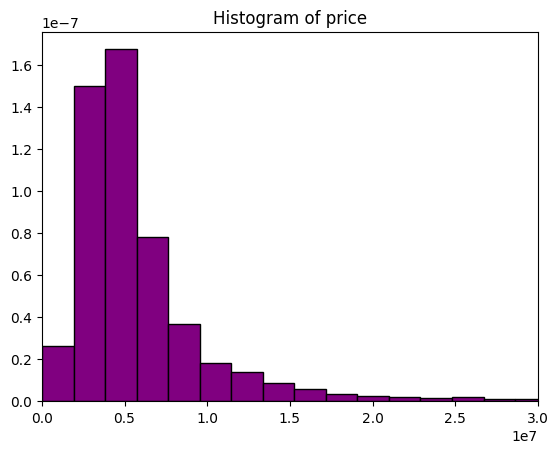

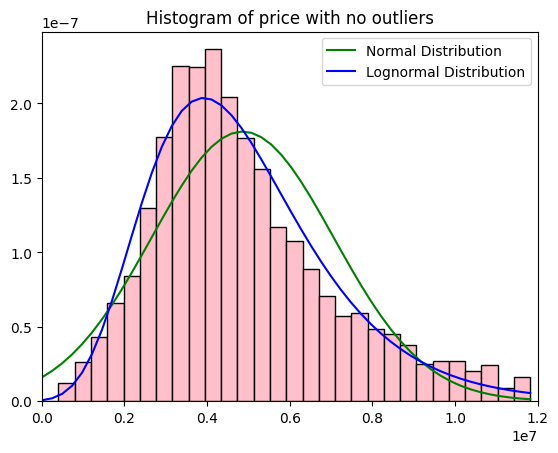

In [635]:
outliers['price'] = detect_outliers(data, 'price')

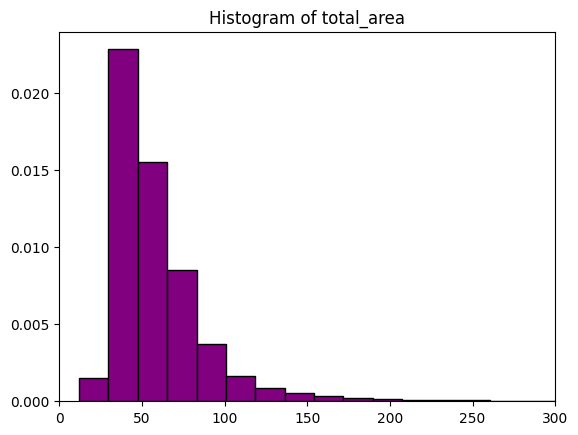

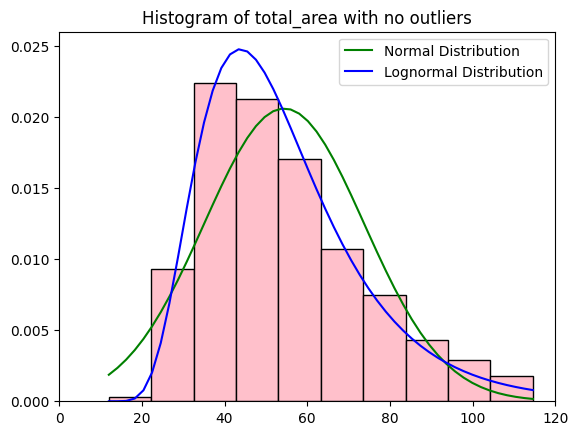

In [636]:
outliers['total_area'] = detect_outliers(data, 'total_area')

Для такого распределения количества комнат в квартирах можно предложить следующую стратегию работы с выбросами. Можно выделить отдельный класс - "6 и более комнат". Для этого заменим все значения столбца rooms, большие 6 (то есть выбросы), на 6 (это будет сделано ниже).

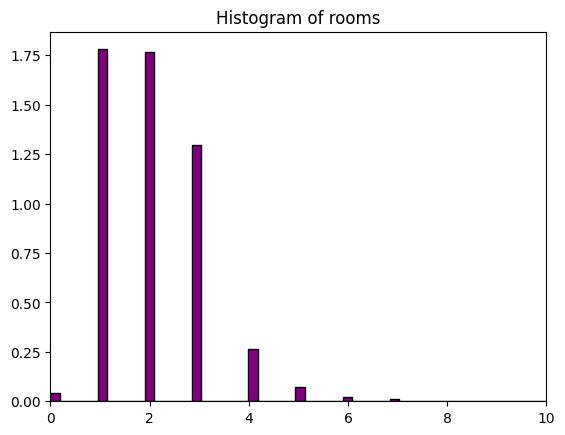

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


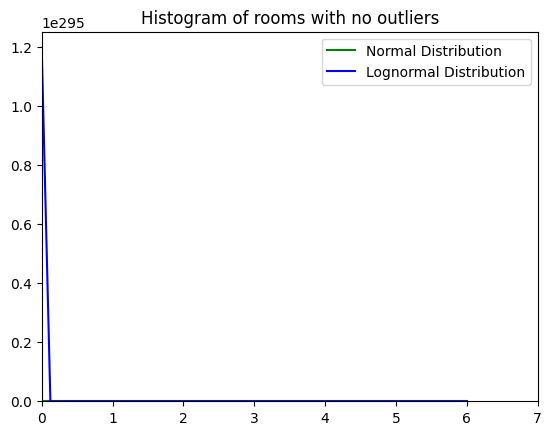

[ 3  1  2  4  5  6  0 11  7  8 14 10 15  9 19 16 12]


In [637]:
outliers['rooms'] = detect_outliers(data, 'rooms')
print(data['rooms'].unique())

Для начала заменим все значения в столбце ceiling_height около 20-30 на значения в 10 раз меньше, так как, возможно, в этих записях потерялась точка в нужном месте. 

/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_20715/3185397872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ceiling_height'].replace({32 : 3.2, 27 : 2.7, 26 : 2.6, 25 : 2.5, 27.5 : 2.75, 24 : 2.4, 20 : 2, 22.6 : 2.26}, inplace=True)


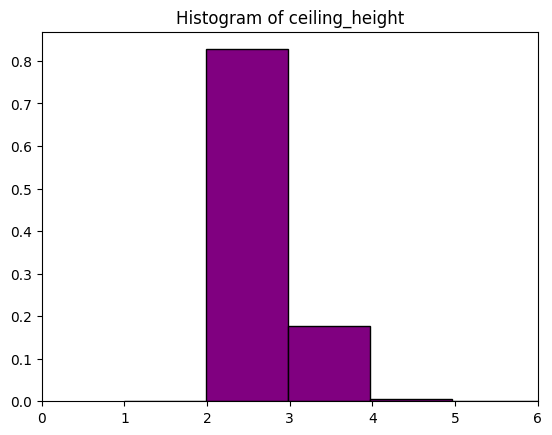

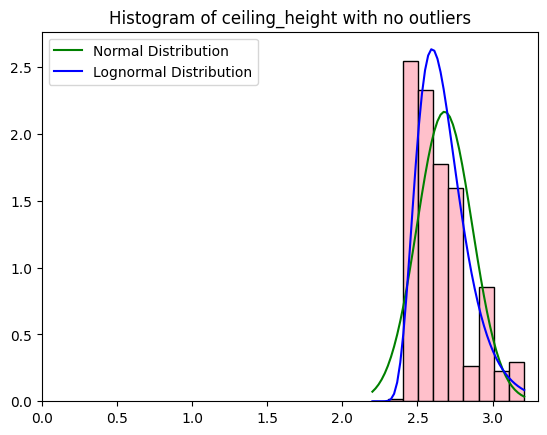

In [638]:
data['ceiling_height'].replace({32 : 3.2, 27 : 2.7, 26 : 2.6, 25 : 2.5, 27.5 : 2.75, 24 : 2.4, 20 : 2, 22.6 : 2.26}, inplace=True)
# print(data['ceiling_height'].unique()) 
outliers['ceiling_height'] = detect_outliers(data, 'ceiling_height')

Видя такое распределение этажей в доме, можно предложить заменить выбросы на максимальное возможное количество этажей.

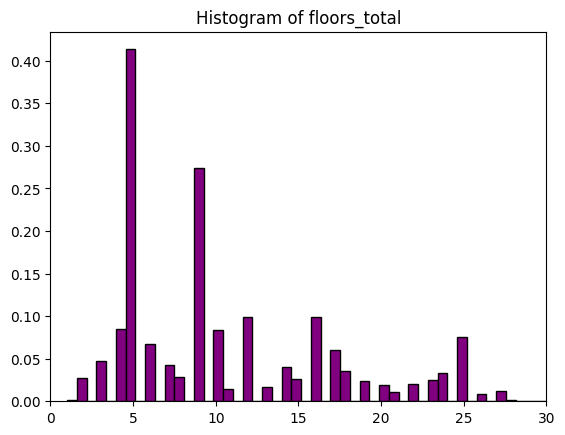

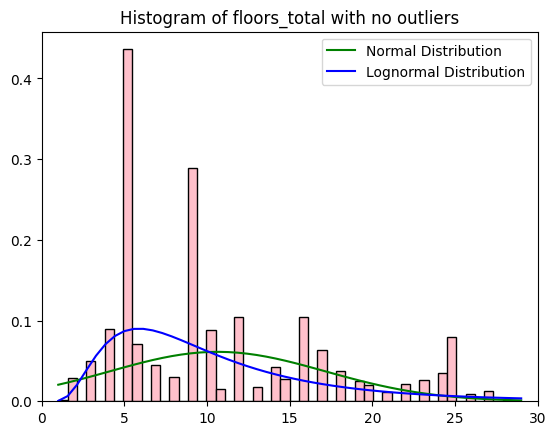

In [639]:
outliers['floors_total'] = detect_outliers(data, 'floors_total')

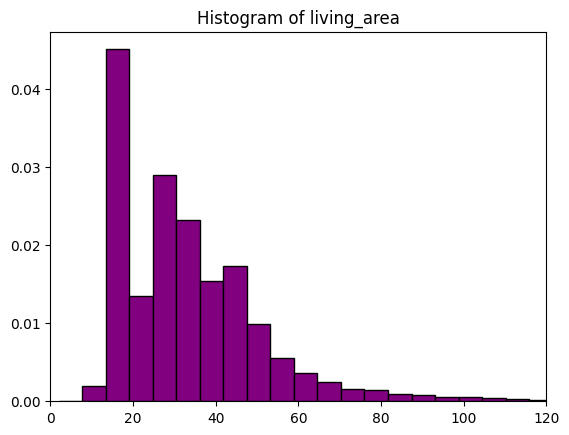

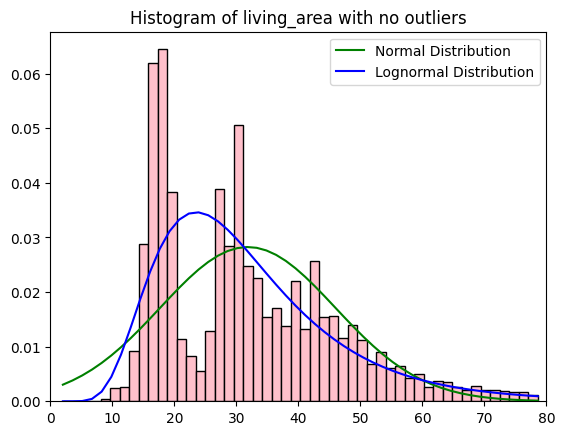

In [640]:
outliers['living_area'] = detect_outliers(data, 'living_area')

С этажом квартиры можно поступить так же, как с этажом дома, то есть все значения, большие 17, заменить на 17. 

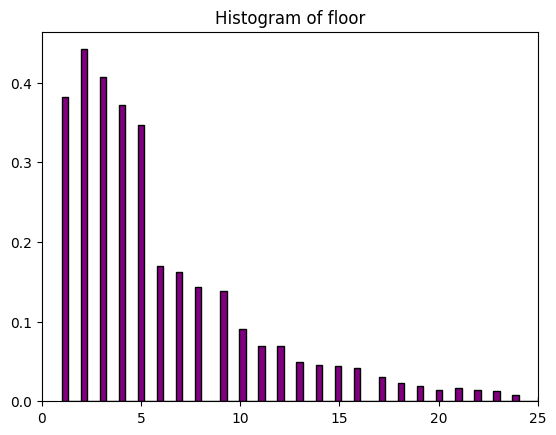

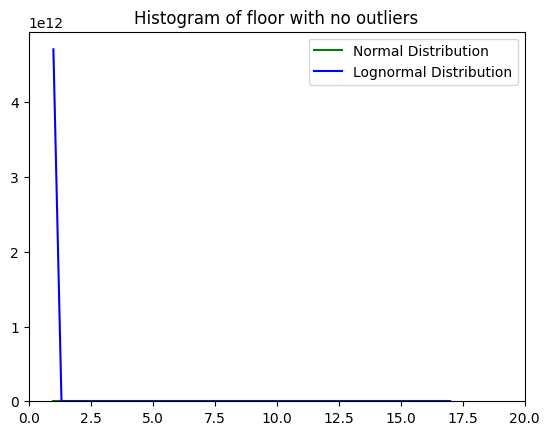

In [641]:
outliers['floor'] = detect_outliers(data, 'floor')

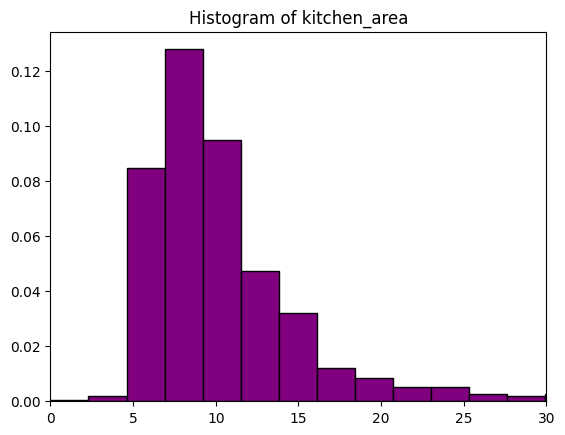

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


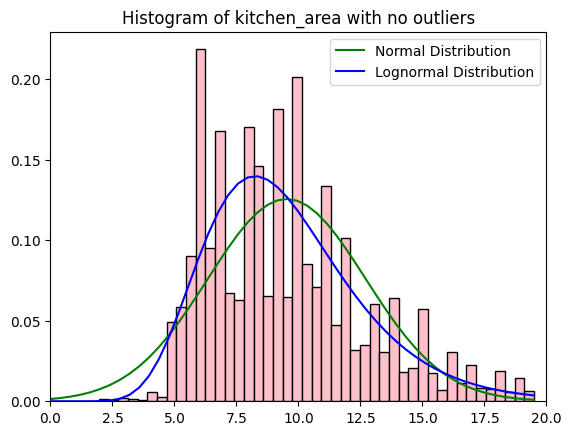

In [642]:
outliers['kitchen_area'] = detect_outliers(data, 'kitchen_area')

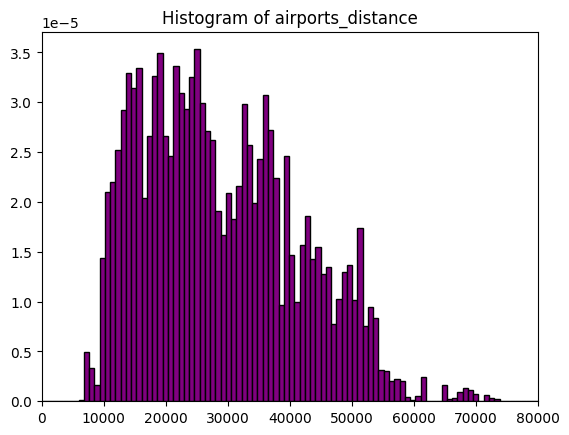

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


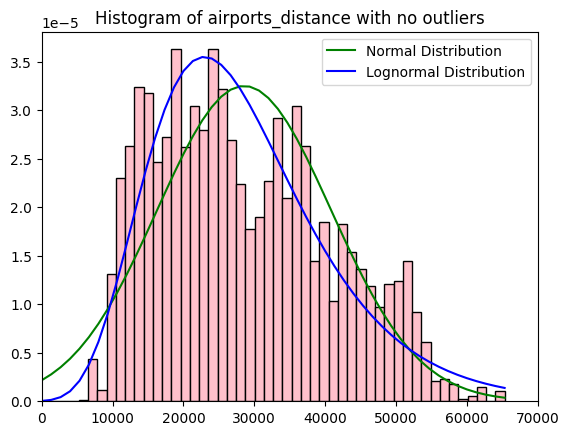

In [643]:
outliers['airports_distance'] = detect_outliers(data, 'airports_distance')

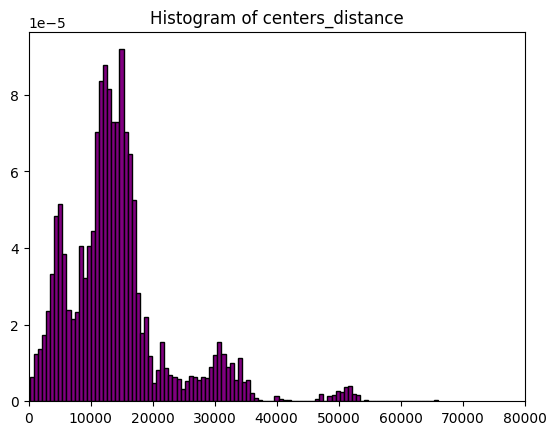

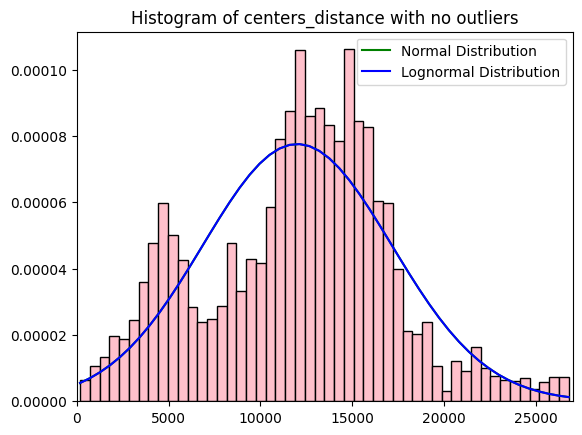

In [644]:
outliers['centers_distance'] = detect_outliers(data, 'centers_distance')

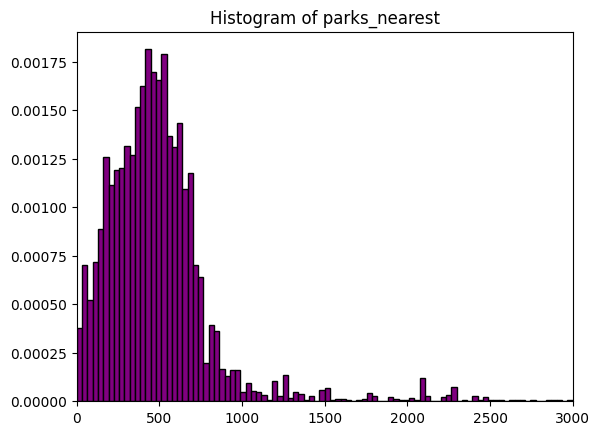

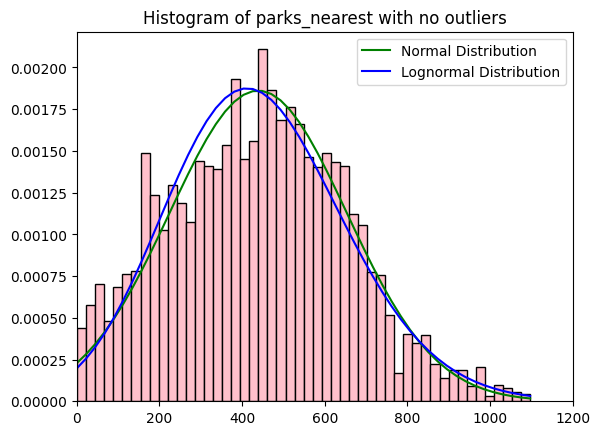

In [645]:
outliers['parks_nearest'] = detect_outliers(data, 'parks_nearest')

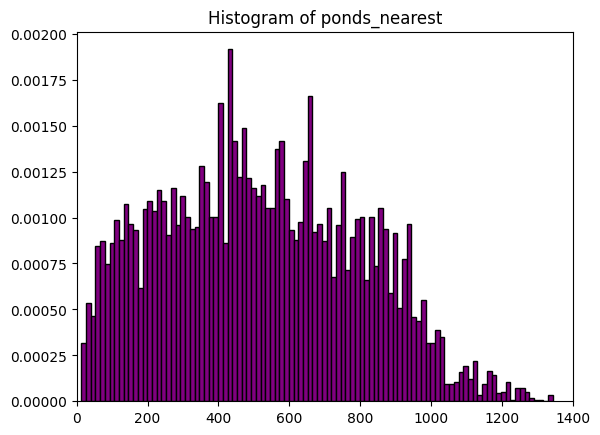

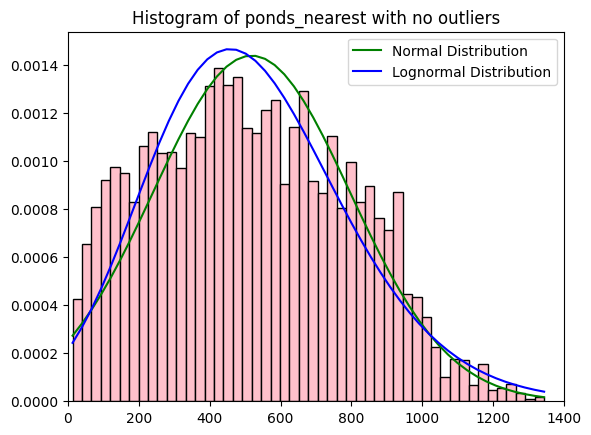

In [646]:
outliers['ponds_nearest'] = detect_outliers(data, 'ponds_nearest')

Для столбца balcony заменим выбросы на максимальное возможное значение.

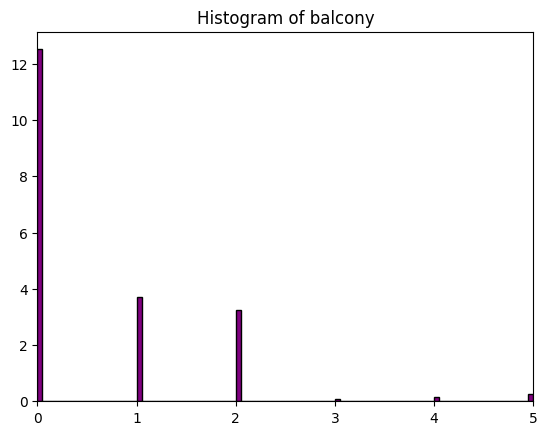

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2036: RuntimeWarning: overflow encountered in divide
  place(output, cond, self._pdf(*goodargs) / scale)


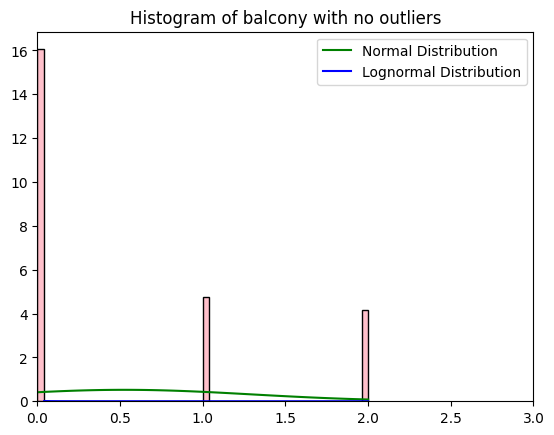

In [647]:
outliers['balcony'] = detect_outliers(data, 'balcony')

Таким образом, все аномальные значения в столбцах (кроме столбцов rooms, floors_total, floor и balcony) будем заменять на сэплированные значения из логнормального распределения. 

In [648]:
df = data.copy()

colomns_lognormal = ['price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 
                    'airports_distance', 'centers_distance', 'parks_nearest', 'ponds_nearest']
colomns_max = ['rooms', 'floors_total', 'floor', 'balcony']

In [649]:
def replace_outliers(df, columns, outliers, type): 
    if type == 'lognormal':
        for column in columns: 
            s, loc, scale = lognorm.fit(df[column].dropna()) 
            
            if column in ['airports_distance', 'centers_distance', 'parks_nearest', 'ponds_nearest']:
                nan_indices = df[column].isnull()
                num_nan = nan_indices.sum()
                df.loc[nan_indices, column] = lognorm.rvs(s, loc=loc, scale=scale, size=num_nan, random_state=123)

            if column == 'ceiling_height':
                df[column].fillna(df[column].mean(), inplace=True)

            df.loc[outliers[column].index, column] = stats.lognorm.rvs(s, loc=loc, scale=scale, size=len(outliers[column]), random_state=123)
            
    if type == 'max':
        for column in columns:
             df.loc[outliers[column].index, column] = [outliers[column].min() - 1] * len(outliers[column])

In [650]:
replace_outliers(df, colomns_lognormal, outliers, 'lognormal')
replace_outliers(df, colomns_max, outliers, 'max')

df.info()

/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_20715/3388138386.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6626: 

<class 'pandas.core.frame.DataFrame'>
Index: 22181 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              22181 non-null  float64
 1   total_area         22181 non-null  float64
 2   rooms              22181 non-null  int64  
 3   ceiling_height     22181 non-null  float64
 4   floors_total       22181 non-null  Int64  
 5   living_area        22181 non-null  float64
 6   floor              22181 non-null  int64  
 7   studio             22181 non-null  bool   
 8   kitchen_area       22181 non-null  float64
 9   balcony            22181 non-null  Int64  
 10  airports_distance  22181 non-null  float64
 11  centers_distance   22181 non-null  float64
 12  parks_nearest      22181 non-null  float64
 13  ponds_nearest      22181 non-null  float64
dtypes: Int64(2), bool(1), float64(9), int64(2)
memory usage: 2.9 MB


#### 5) Закодируем категориальные признаки (studio):

In [651]:
df['studio'].replace({True : 1, False : 0}, inplace=True)

/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_20715/3010322373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['studio'].replace({True : 1, False : 0}, inplace=True)
/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_20715/3010322373.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

#### 6) Нормализуем данные (используем Min-Max Scaling):

In [652]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_normalize = ['price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 
                       'floor', 'kitchen_area', 'airports_distance', 'centers_distance', 
                       'parks_nearest', 'ponds_nearest']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

#### 7) Добавим новые признаки:
- price_per_m: цена за квадратный метр (price / total_area);
- living_percent: процент жилой площади от общей плохади квартиры (living_area / total_area);
- kitchen_percent: процент площади кухни от общей площади квартиры (kitchen_area / total_area).

In [653]:
df['price_per_m'] = df['price'] / df['total_area']
df['living_percent'] = df['living_area'] / df['total_area']
df['kitchen_percent'] = df['kitchen_area'] / df['total_area']

#### 8) Отбор значимых признаков 
Для оценки влияния признаков на стоимость квартиры / квадратного метра построим корреляционную матрицу:

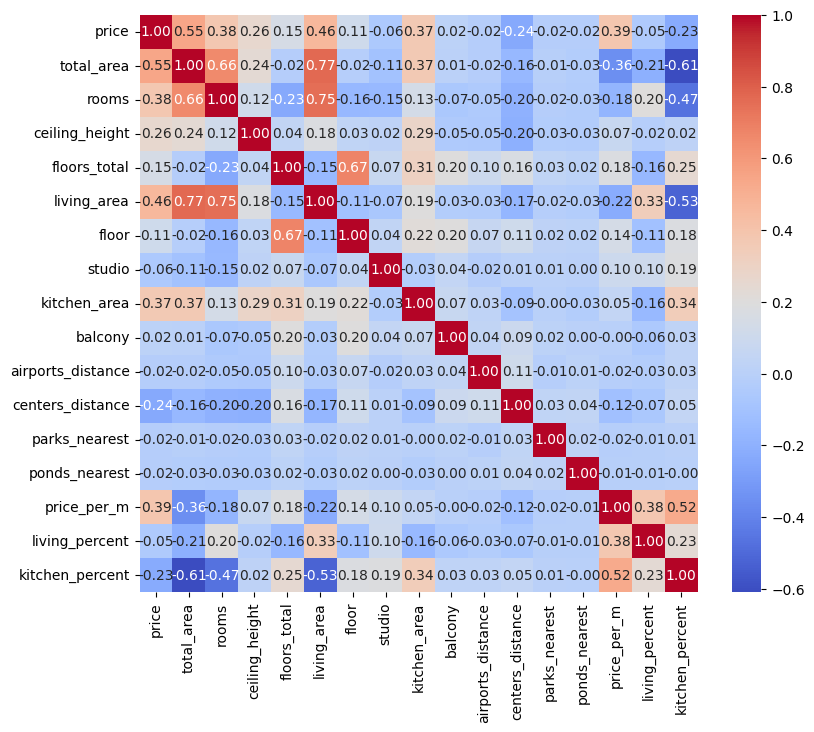

In [654]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(9, 7.5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

По тепловой карте можно понять, что признаки total_area, rooms, living_area и kitchen_area сильно влияют на итоговую стоимость квартиры / квадратного метра.

К тому же можно сделать вывод, что признак total_area сильно коррелирован с признаками rooms, living_area и kitchen_area, а признак rooms - с living_area. 

#### 9) Кластеризация
Попробуем выделить группы, между которыми влияние характеристик на цену за квартиру / квадратный метр различаются. 

Можно предположить, что для квартир - студий влияние площади квартиры на цену сильнее, нежели для квартир, которые не являются студиями. Проверим гипотезу:

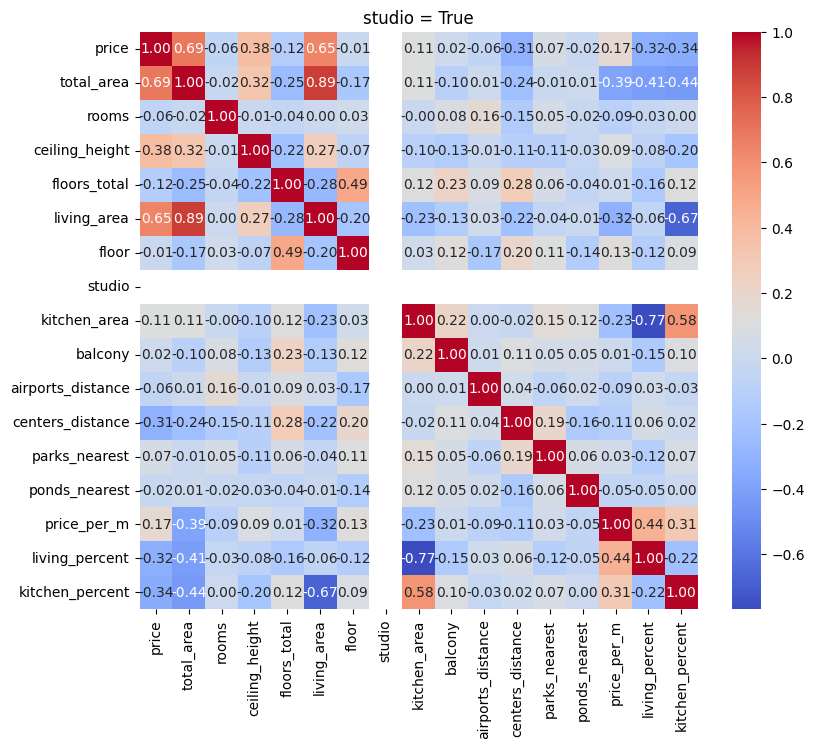

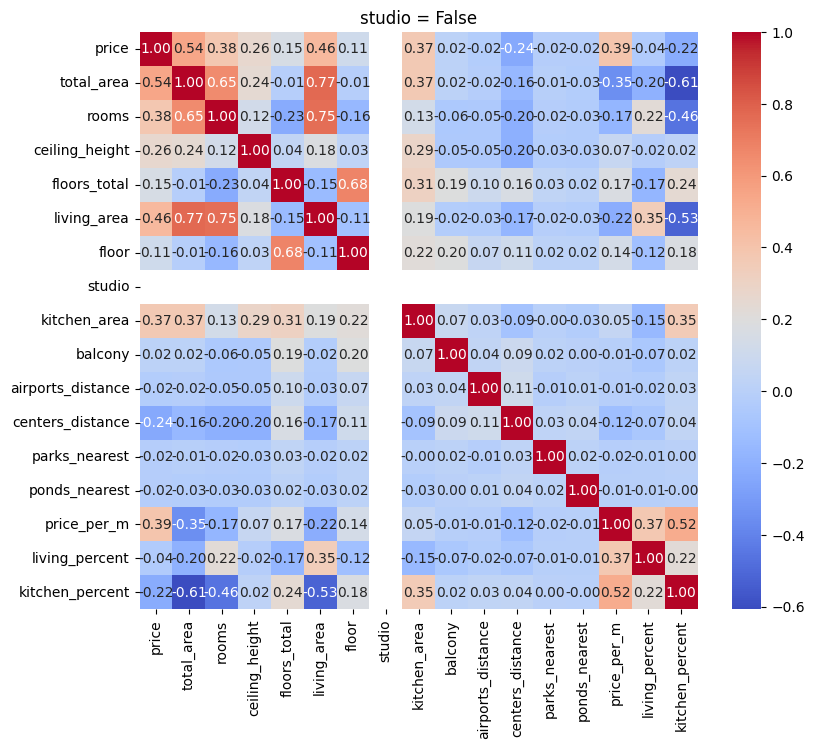

In [655]:
corr_matrix = df[df['studio'] == True].corr()
plt.figure(figsize=(9, 7.5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("studio = True")
plt.show()


corr_matrix = df[df['studio'] == False].corr()
plt.figure(figsize=(9, 7.5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("studio = False")
plt.show()

Действительно, коэффициент корреляции total_area и price выше для квартир-студий. 